In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler = pd.read_csv("maaslar.csv")
veriler

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [2]:
x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]
print(x)
print(y)

   Egitim Seviyesi
0                1
1                2
2                3
3                4
4                5
5                6
6                7
7                8
8                9
9               10
    maas
0   2250
1   2500
2   3000
3   4000
4   5500
5   7500
6  10000
7  15000
8  25000
9  50000


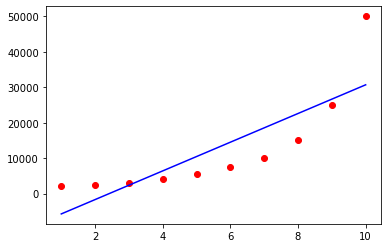

In [3]:
# linear regression kurarak sorunumuz çözülüyor mu ona bakalım
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)

plt.scatter(x, y, color='red')
plt.plot(x, lin_reg.predict(x), color='blue')
plt.show()

In [4]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2) # 2. dereceden polinom
x_poly = poly_reg.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

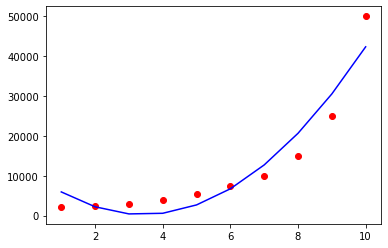

In [5]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)
plt.scatter(x,y, color='red')
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color='blue')
plt.show()

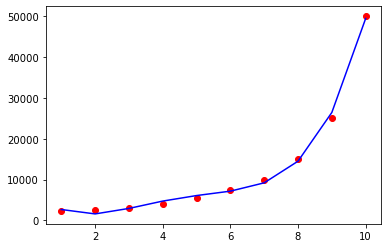

In [6]:
# polynomial regression(artırılmış derece)
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4) # 4. dereceden polinom
x_poly = poly_reg.fit_transform(x)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)
plt.scatter(x,y, color='red')
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color='blue')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

X = x.to_numpy()
Y = y.to_numpy()

sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2 = StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))

[0.01150915]
[0.01150915]


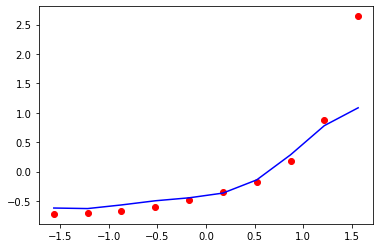

In [8]:
# SVR
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli, y_olcekli)

plt.scatter(x_olcekli, y_olcekli, color = 'red')
plt.plot(x_olcekli, svr_reg.predict(x_olcekli), color = 'blue')

print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))

[50000.]
[10000.]


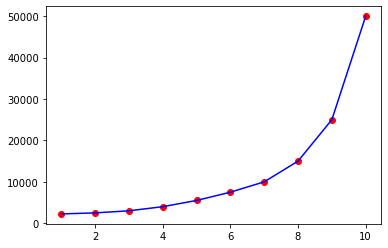

In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

plt.scatter(X, Y, color='red')
plt.plot(X, r_dt.predict(X), color='blue')

print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))

[10500.]


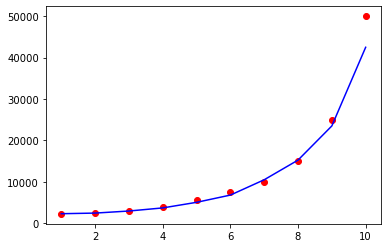

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg.fit(X, Y.ravel())

print(rf_reg.predict([[6.6]]))

plt.scatter(X, Y, color='red')
plt.plot(X, rf_reg.predict(X), color='blue')

# Değerlendirme ve Metotların Karşılaştırılması

In [11]:
# R2(Random Forrest)
from sklearn.metrics import r2_score

print("Random Forrest R2 Değeri")
print(r2_score(Y, rf_reg.predict(X)))
print("Decision Tree R2 Değeri")
print(r2_score(Y, r_dt.predict(X)))
print("SVR R2 Değeri")
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))

print("Polynomial Regression R2 Değeri")
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))
print("Linear Regression R2 Değeri")
print(r2_score(Y, lin_reg.predict(X)))

Random Forrest R2 Değeri
0.9704434230386582
Decision Tree R2 Değeri
1.0
SVR R2 Değeri
0.7513836788854973
Polynomial Regression R2 Değeri
0.9973922891706613
Linear Regression R2 Değeri
0.6690412331929894
